In [1]:
%pylab inline
import seaborn as sbn
import networkx as nx
import pickle
import scipy as sp
import scipy.stats
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:

def func(x, a, b):
    return a * x ** (-b)


def func2(x, a):
    return a / x


def theofunc(x, C, N, ex):
    return (C) * np.power(N / (2 * (-x ** 2 + N * x - N)), ex)


def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [16]:
sbn.set(font_scale=1.5)  # crazy big
sbn.set_style("ticks")
sbn.despine()
#sbn.set_palette(sbn.xkcd_palette(["tomato", "windows blue", "amber", "greyish", "dusty purple", "faded green"]))

<Figure size 432x288 with 0 Axes>

In [108]:
## Reading in simulation results
num_sims = 5
lengths = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 21, 23, 25, 28, 30, 33, 36, 40, 44, 48, 52, 58, 63, 69,
           76, 83, 91, 100, 110, 120, 132, 145, 158, 174, 191, 209, 229, 251, 275, 302]
sim_results = []
for k in lengths:
    length_list_sim = []
    lililist = []  # making a histogram of all sims of one length
    for i in np.random.permutation(range(1, num_sims + 1)):
        M = np.array(
            np.loadtxt('../data/K50/Nora50_matrix_%d_%d.txt' % (k, i)))
        N = len(M)
        M[M > 1] = 0
        G = nx.from_numpy_matrix(M)
        sim_Li = list(G.edges())
        for link in sim_Li:
            lililist.append(abs(link[0] - link[1]))
    sim_results.append([k, np.histogram(lililist, bins=range(1, 1000))])

(1, 100)

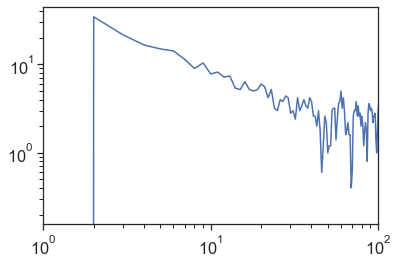

In [127]:
x = linspace(1,1000,998)
plt.plot(x,sim_results[-5][1][0]/5)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,100)

In [117]:
sim_results[-5][1]

(array([  0, 173, 108,  83,  75,  71,  57,  45,  52,  39,  41,  36,  37,
         27,  26,  32,  26,  25,  26,  30,  28,  21,  26,  16,  15,  20,
         19,  22,  21,  14,  15,  12,  21,  15,  17,  20,  17,  16,  21,
         19,  13,  13,  10,  15,   9,   3,   6,  13,  11,   5,   6,   6,
         15,  16,  16,   7,  12,  18,  19,  25,  16,  21,  14,   8,   9,
         11,   8,   8,   2,   3,  13,  15,  15,  19,  13,  17,  13,  14,
         10,  13,  10,   6,   9,  11,   9,   4,  14,  18,  17,  15,  16,
         15,  11,  13,  13,  14,   7,   5,   9,  15,  19,  18,   9,   7,
          9,   4,   2,   5,   4,   5,   7,   5,   8,   4,   4,   4,   2,
          4,   5,   5,   8,   4,   6,   7,   4,   3,   4,   6,   3,   2,
          5,   3,   1,   2,   4,   6,   6,   6,   6,   7,   3,   3,   4,
          4,   5,   8,   3,   1,   3,   2,   3,   6,   4,   3,   5,   3,
          4,   7,   8,   2,   2,   1,   3,   4,   3,   1,   3,   3,   2,
          1,   5,   5,   6,   1,   3,   1,   0,   4

In [7]:
## Reading in pdb results
with open('pdb_results.pkl', 'rb') as f:
    results = pickle.load(f)

In [27]:
numnum = 20
logscale = np.logspace(np.log10(3), np.log10(1000), num=numnum)
heixdip = 2
countbin = 0
summing= np.zeros(996)
bsum = np.zeros(numnum - 1)
for i in range(len(results)):
    me = results[i]
    bin_means, bin_edges, binnumber = sp.stats.binned_statistic(me[1][1][:-1], me[1][0], statistic=np.mean, bins=logscale)
    bin_centers = bin_edges[1:] - (bin_edges[1:] - bin_edges[0:numnum - 1]) / 2
    if me[0] < 260 and me[0] > 130:
        summing= summing+ me[1][0]
        bsum= bsum+ bin_means
        countbin += 1

In [50]:
len(sim_results)

45

In [60]:
bin_range = np.linspace(3, 998, 996,dtype='int')
summing = np.zeros(len(bin_range))
bsum = np.zeros(numnum - 1)
countbin = 0
for i in range(len(sim_results)):
    me = sim_results[i]
    bin_means, bin_edges, binnumber = sp.stats.binned_statistic(me[1][1][:-1], me[1][0], statistic=np.mean,
                                                                bins=logscale)
    bin_centers = bin_edges[1:] - (bin_edges[1:] - bin_edges[0:numnum - 1]) / 2
    if me[0] < 210 and me[0] > 200:
        summing = summing + me[1][0]
        bsum = bsum + bin_means
        countbin += 1
print('number of len around 200 sim', (countbin * num))
print(me[1][0][0])


number of len around 200 sim 5
120


In [92]:
def get_statistics(results, logscale, bin_range, numnum=20, num=1, lower=200, upper=210):
    general_sum = np.zeros(len(bin_range))
    bin_sum = np.zeros(numnum -1)
    bin_counter = 0
    for res in results:
        bin_means, bin_edges, binnumber = sp.stats.binned_statistic(bin_range, res[1][0], statistic=np.mean,
                                                                bins=logscale)
        bin_centers = bin_edges[1:] - (bin_edges[1:] - bin_edges[0:numnum - 1]) / 2
        if res[0] < upper and res[0] > lower:
            general_sum = general_sum + res[1][0]
            bin_sum = bin_sum + bin_means
            bin_counter += 1
    normalised_count = general_sum/(bin_counter*num)
    normalised_bin_count = bin_sum/(bin_counter*num)
    return normalised_count, normalised_bin_count, bin_centers
    

## Length 200

In [77]:
# read in data

In [80]:
normalised_bins = get_statistics(results,logscale,bin_range)

fit [84.53121692  0.9552531 ]
sim fit [18.19396522  1.05512891]


<ipython-input-2-a8fbbf4ac2ea>:10: RuntimeWarning: invalid value encountered in power
  return (C) * np.power(N / (2 * (-x ** 2 + N * x - N)), ex)


Text(0.5, 0, 'Degree k')

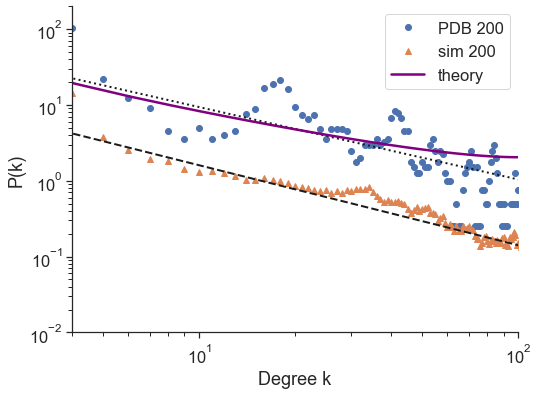

In [95]:
# plot data
# Setting figure size
plt.figure(figsize=(8,6))

# Plotting the pdb data
normalised_counts_pdb, normalised_bin_pdb, bin_centers = get_statistics(results,logscale,bin_range)
plt.plot(bin_range, normalised_counts_pdb, linewidth=0, marker='o', label='PDB 200')
fit, ficov = curve_fit(func, bin_range[heixdip:-1], normalised_counts_pdb[heixdip:-1])
print('fit', fit)
plt.plot(bin_range, func(bin_range, fit[0], fit[1]), ':', color='k', lw=2)


# plotting the simulation data
normalised_counts_sim, normalised_bin_sim, bin_centers_sim = get_statistics(results, logscale, bin_range, numnum=20, num=5, lower=130, upper=260)
plt.plot(bin_range,normalised_counts_sim, linewidth=0, marker='^', label='sim 200')
fit, ficov = curve_fit(func,bin_range[heixdip:-1], normalised_counts_sim[heixdip:-1])
print('sim fit', fit)
plt.plot(bin_range, func(bin_range, fit[0], fit[1]), '--',color ='k', lw=2)

# theory
simlen = np.linspace(0, 100, num=50)
plt.plot(np.array(simlen), theofunc(np.array(simlen), 80.0, 200.0, 0.8), label='theory', lw =2.5, color='purple')


plt.yscale('log')
plt.xscale('log')
plt.xlim([4, 100])
plt.ylim([0.01, 200])
plt.legend()
sbn.despine()
plt.ylabel("P(k)")
plt.xlabel("Degree k")


## Length 400

In [4]:
# read in data

In [5]:
# plot data